Showing how the wave advances in 3D. This will be an animation in the supplementary material.

In [1]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens')
# Set color and size of text and annotations
# Text size, text color, line color
tsize = 12; tc = plt.cm.get_cmap('PiYG')(0.1); lc = tc;

# Figsize consistent
figsize = (4,4)

In [3]:
## Set params
s = 0.99
N = 60
c = 1300
al= 0.001

# Set up grid to be large enough given the dispersal kernel
xrexp = 19; dx=16;
xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

# Set up three regions for wave
p1 = 200
p2 = 300
p3 = 400
parr = np.ones([len(xr)])*p1
# Width of first and intermediate in km
w = 75
parr[int((2**xrexp+w*1000)/dx):int((2**xrexp+2*w*1000)/dx)] = p2
parr[int((2**xrexp+2*w*1000)/dx)::] = p3

# Get the list of functions. Do this as a dictionary where the keys are the p values
fopt_list = {}
for p in [p1,p2,p3]:
    fopt_list[p] = sf.getfopt(p,c)

# Now define f in the parr case. This assumes both m and parr are arrays!
def farr(m,parr):
    return np.array([fopt_list[p](mm) for p,mm in zip(parr,m)])

In [4]:
# Simulate

# Number of steps
nt = 200

# Get initial setup
x0 = sf.get_x0even(xrexp,dx,fopt_list[p1],c,s,N)

# Iterate
wave = sf.iterate(xr,nt,farr,x0,al,c,s,N,parr=parr)

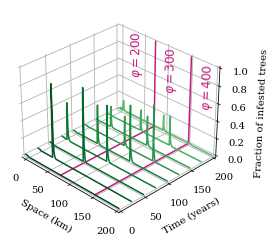

In [6]:
## Now plot

# Times to plot
tplot = np.arange(nt+1)[::25]

# Colors based on that
cm = cmap(np.linspace(0,1,num=len(tplot)+10))

# Limits in km
xlim = (-5,200)

# Plot as lines
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(projection='3d')

# Plot for each time
for i,t in enumerate(tplot):
    ax.plot(xr[int((2**xrexp+xlim[0]*1000)/dx):int((2**xrexp+xlim[1]*1000)/dx)]/1000, 
            wave[t,N+2,int((2**xrexp+xlim[0]*1000)/dx):int((2**xrexp+xlim[1]*1000)/dx)],
            zs=t, zdir='y', c=cm[-(i+1)],zorder=-t) #zdir puts this at y=0
# Set lims
ax.set(xlim=xlim,ylim=(tplot[0],tplot[-1]),zlim=(0,1),
       xlabel='Space (km)',ylabel='Time (years)',zlabel='Fraction of infested trees')

# Now annotate where the threshold is
ax.plot([w,w],[tplot[0],tplot[-1]],c=lc,zorder=-2*nt)
ax.plot([w,w],[0,1],zs=[nt+1,nt+1],c=lc,zorder=-2*nt,zdir='y')
ax.text(w/4, tplot[-1], 1/2, r'$\varphi={:.0f}$'.format(p1),
        zdir='z',size=tsize, zorder=1, color=tc)
ax.plot([2*w,2*w],[tplot[0],tplot[-1]],c=lc,zorder=-2*nt)
ax.plot([2*w,2*w],[0,1],zs=[nt+1,nt+1],c=lc,zorder=-2*nt,zdir='y')
ax.text(3*w/2-w/4, tplot[-1], 1/2, r'$\varphi={:.0f}$'.format(p2),
        zdir='z',size=tsize, zorder=1, color=tc)
ax.text(np.min([5*w/2-w/4,(2*w+xlim[1])/2]), tplot[-1], 1/2, r'$\varphi={:.0f}$'.format(p3),
        zdir='z',size=tsize, zorder=1, color=tc)
# Change viewpoint and save
ax.view_init(elev=30., azim=-45)
# Customize axes
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
#    axis._axinfo['grid']['color'] = (1, 1, 1, 0)
    axis.set_pane_color((1, 1, 1, 0))
fig.savefig('figures/higherresilience.pdf',bbox_inches='tight')

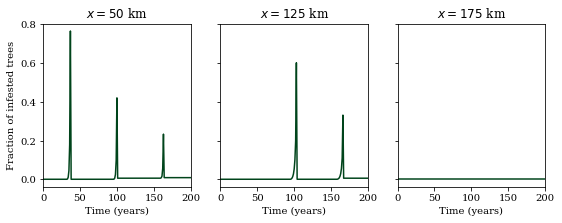

In [8]:
# Now plot in 2D at 3 spatial locations
xloc = [50,125,175]

fig,axs = plt.subplots(1,3,figsize=(9,3),sharey=True)

for i,xx in enumerate(xloc):
    axs[i].plot(wave[:,N+2,int((2**xrexp+xx*1000)/dx)], c=cm[-1])
    axs[i].set_title(r'$x={:.0f}$ km'.format(xx))
for ax in axs:
    ax.set_xlim(0,200)
    ax.set_xlabel('Time (years)')
axs[0].set_ylabel('Fraction of infested trees')
fig.savefig('figures/higherresilience_staticloc.pdf',bbox_inches='tight')